This script simply plots the median MSE for each value of k in the optimized KNN fits.

In [1]:
library(dplyr)
library(tidyverse)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ readr   1.3.1
✔ tibble  2.1.1     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ ggplot2 3.1.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


k,MSE
2,0.3576871
2,0.5149052
2,0.4101896
2,0.5461446
2,0.4027591
2,0.4103582


k,median,mean,lq,uq,sd,max,min
2,0.4367607,0.4804488,0.3969682,0.4773404,0.2401329,2.005865,0.3192531
4,0.3912484,0.4191824,0.3334880,0.4403671,0.2272207,1.938835,0.2746850
6,0.3628472,0.3981536,0.3193967,0.4065422,0.2286623,1.928273,0.2632662
8,0.3554834,0.3912984,0.3099873,0.4049555,0.2298276,1.928176,0.2493604
10,0.3503908,0.3910130,0.3168021,0.4050399,0.2298345,1.925123,0.2489705
12,0.3515587,0.3921919,0.3176685,0.4107830,0.2289377,1.918960,0.2553652


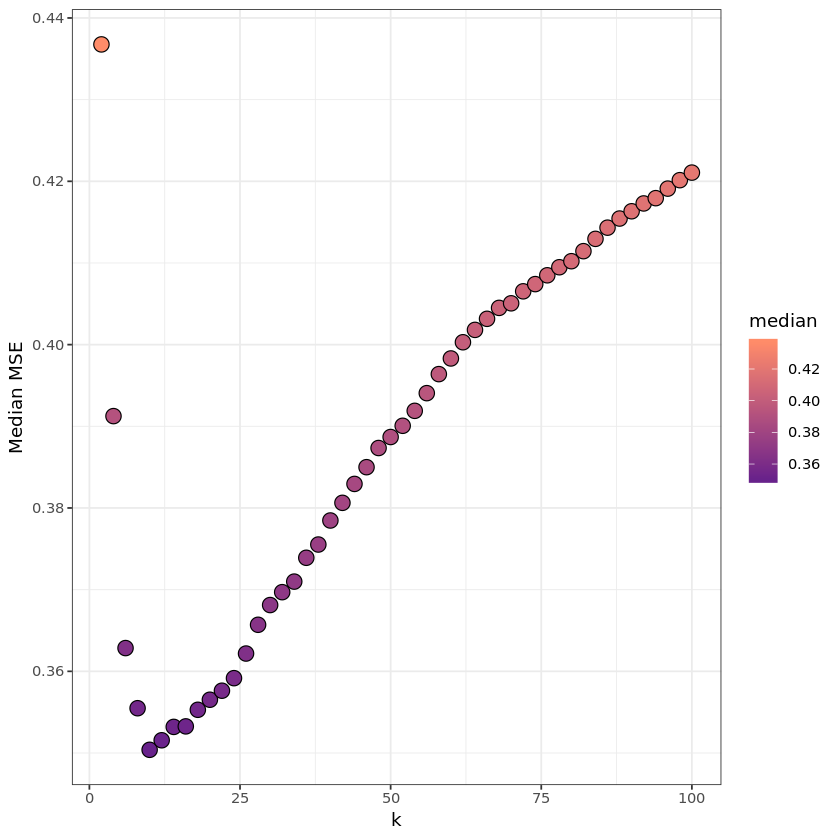

In [2]:
d <- read.csv('objectively_determine_k_50reps_30percent.csv')
colnames(d) <- seq(2, 100, 2)
d <- gather(d, key=k, value=MSE)
d$k <- as.integer(d$k)
head(d)
d <- d %>% group_by(k) %>% summarise(median=median(MSE),
                                     mean=mean(MSE),
                                     lq=quantile(MSE, probs=0.25),
                                     uq=quantile(MSE, probs=0.75),
                                     sd=sd(MSE),
                                     max=max(MSE),
                                     min=min(MSE))
head(d)
ggplot(d, aes(x=k, y=median, fill=median)) + 
  geom_point(shape=21, size=4) +
  scale_fill_gradient(low='darkorchid4', high='salmon1') + 
  ylab("Median MSE") + 
  theme_bw()